## 공공데이터를 활용한 복습

In [1]:
# 데이터 불러오기
import pandas as pd
csvFile = 'C:/Users/chunc/Desktop/취업캠프/python/python/01. CCTV_in_Seoul.csv'
xlsFile = 'C:/Users/chunc/Desktop/취업캠프/python/python/01. population_in_Seoul.xls'

In [2]:
# CCTV데이터 읽어오기
CCTV_df = pd.read_csv(csvFile)
CCTV_df.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
CCTV_df.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
# '기관명' -> '구별'로 변경하려면
# 방법1: 리스트 전체를 가져와서 '기관명' 수정
# 방법2: rename함수 사용하여 '기관명'만 수정

In [5]:
# 방법1
CCTV_df.columns = ['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년']
CCTV_df.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
# 방법2
CCTV_df.rename(columns = {CCTV_df.columns[0]: '구별'}, inplace = True)

In [7]:
CCTV_df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [8]:
# pop데이터 불러오기
pop_df = pd.read_excel(xlsFile, header = 2, usecols = 'B, D, G, J, N')
pop_df.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [9]:
pop_df.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

In [10]:
# rename함수 이용
pop_df.rename(columns = {'자치구':'구별', '계':'인구수', '계.1':'한국인', '계.2':'외국인', '65세이상고령자':'고령자'},inplace = True)

In [11]:
pop_df.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [12]:
# 구별 CCTV개수를 가장 적은 구부터 정렬
CCTV_df.sort_values(by = '소계', ascending = True).head(5)[['구별', '소계']]

,구별,소계
9,도봉구,485
12,마포구,574
17,송파구,618
24,중랑구,660
23,중구,671


In [13]:
# 가장 많은 구 5개
CCTV_df.sort_values(by = '소계', ascending = False).head(5)[['구별', '소계']]

,구별,소계
0,강남구,2780
18,양천구,2034
14,서초구,1930
21,은평구,1873
20,용산구,1624


In [14]:
# 컬럼추가 -> '최근증가율'을 계산해서 추가
CCTV_df['최근증가율'] = ((CCTV_df['2014년'] + CCTV_df['2015년'] + CCTV_df['2016년']) / CCTV_df['2013년도 이전']) * 100

In [15]:
CCTV_df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780


In [16]:
# '최근증가율'로 정령 (높은 구부터)
CCTV_df.sort_values(by = '최근증가율', ascending = False).head()[['구별', '최근증가율']]

,구별,최근증가율
22,종로구,248.922414
9,도봉구,246.638655
12,마포구,212.101911
8,노원구,188.929889
1,강동구,166.490765


소계와 2013~2016년도의 합계가 다른이유는 오래된 CCTV등의 유무가 누락되었기 때문

In [17]:
pop_df.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [18]:
# 인구가 가장 많은 구 5개
# 합계행을 삭제하기 전이므로 head(6)으로 실행함
pop_df.sort_values(by='인구수', ascending = False).head(6)[['구별', '인구수']]

,구별,인구수
0,합계,10197604.0
24,송파구,667483.0
16,강서구,603772.0
23,강남구,570500.0
11,노원구,569384.0
21,관악구,525515.0


In [19]:
# 서울시의 구가 몇개인가?
# unique()함수를 사용하면 중복된 이름은 하나로 정리
pop_df['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [20]:
# 결측치 확인
pop_df['구별'].isna()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [21]:
pop_df['구별'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 구별, dtype: bool

In [22]:
# null인 행의 데이터 출력
pop_df[pop_df['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [23]:
# 데이터프레임에서 한 행 삭제
# pop_df.drop()
# null값이 존재하는 행 삭제
# pop_df.dropna()

In [24]:
# pop_df.drop() 사용
pop_df.drop([26], inplace = True)

In [25]:
# pop_df.dropna() 사용
pop_df.dropna(inplace = True)

In [26]:
pop_df.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [27]:
pop_df['외국인비율'] = (pop_df['외국인'] / pop_df['인구수']) * 100
pop_df['고령자비율'] = (pop_df['고령자'] / pop_df['인구수']) * 100
pop_df.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [28]:
pop_df.drop([0], axis = 0, inplace = True)

In [29]:
# 데이터프레임 합치기
all_df = pd.merge(CCTV_df, pop_df, on = '구별')
all_df.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [30]:
# 불필요한 컬럼 삭제
# ['2013년도 이전',	'2014년', '2015년', '2016년']
# 방법 1: drop(['2013년도 이전', '2014년', '2015년', '2016년'])
# 방법 2: del all_df['2013년도 이전'] ... ['2016년']
all_df.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis = 1, inplace = True)

In [31]:
all_df.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [32]:
# 데이터프레임의 index를 '구별'로 변경
# set_index()
# 실행 후 다시 그래프 출력
all_df.set_index('구별', inplace = True)

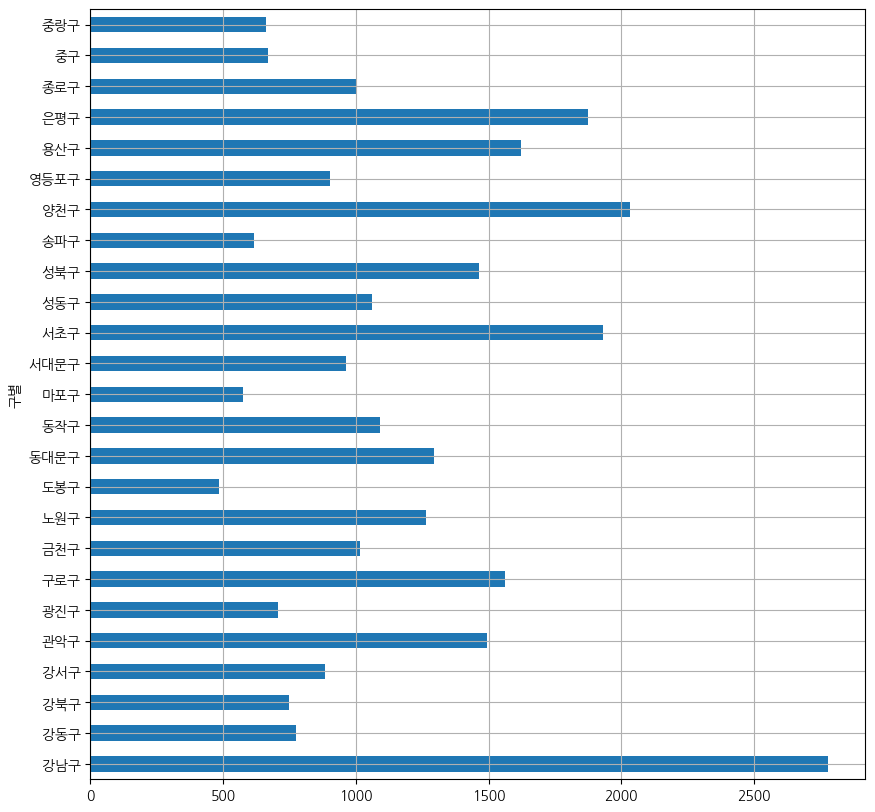

In [33]:
# 그래프 그리기
import matplotlib.pyplot as plt
plt.figure()
all_df['소계'].plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

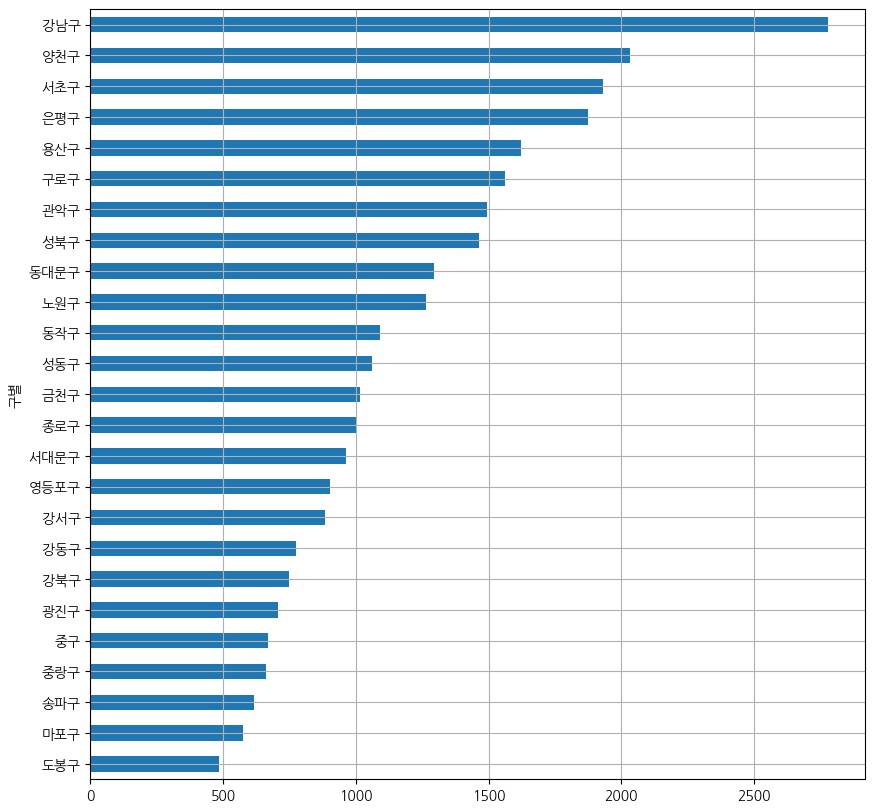

In [34]:
# 그래프 그리기 전에 정렬을 실행한다
plt.figure()
all_df['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

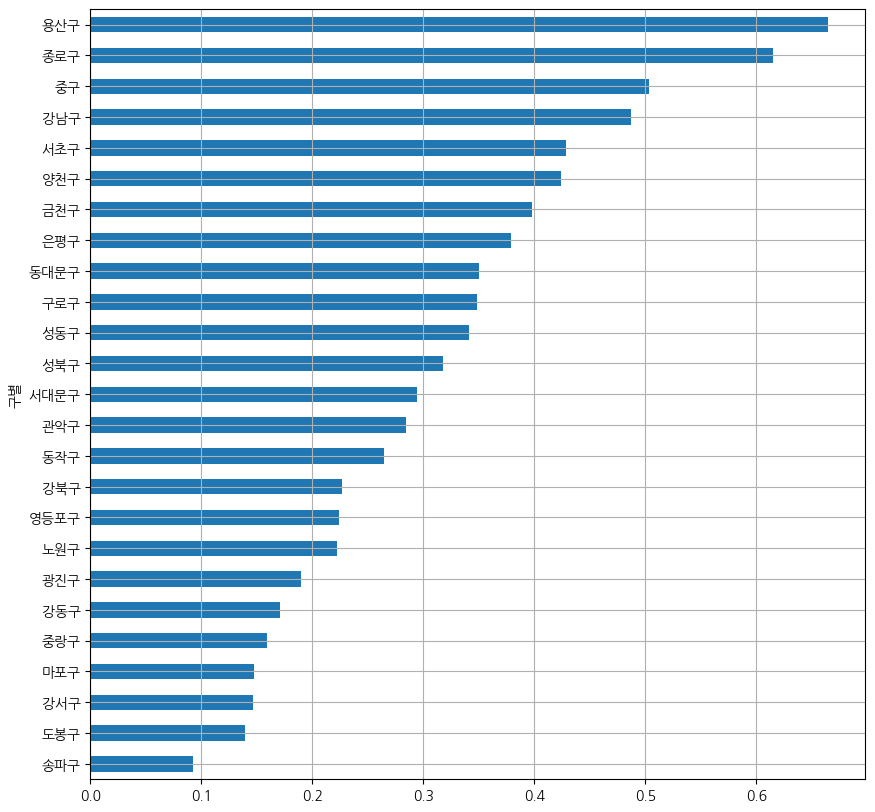

In [35]:
# CCTV비율을 그래프로 표현
all_df['CCTV비율'] = (all_df['소계'] / all_df['인구수']) *100

plt.figure()
all_df['CCTV비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10, 10))
plt.show()

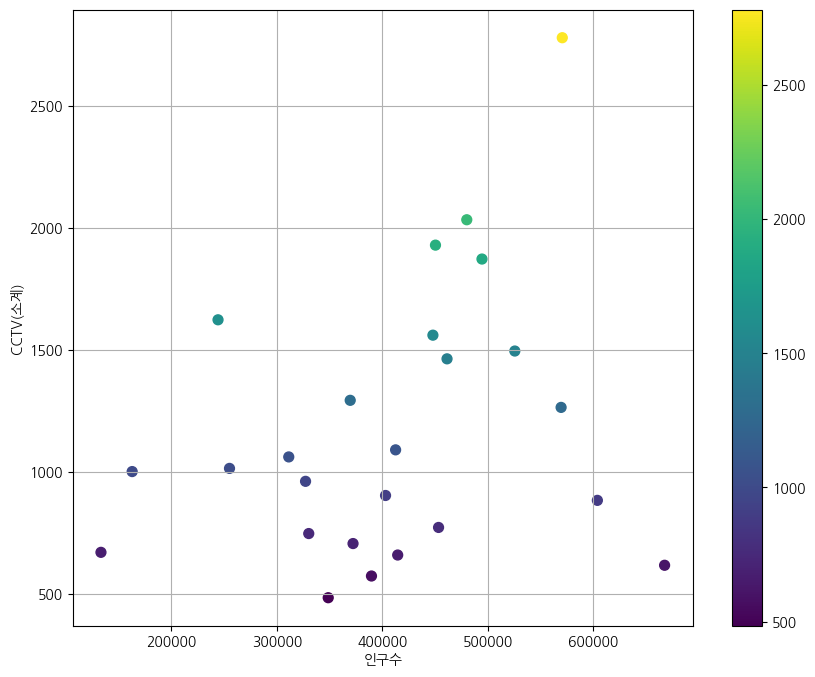

In [36]:
# scatter()함수를 통해서 인구수(x)대비 소계(y)를 시각화
# s = markersize
plt.figure(figsize = (10, 8))
plt.scatter(all_df['인구수'], all_df['소계'], s = 50, c = all_df['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV(소계)')
plt.grid()
plt.colorbar()
plt.show()

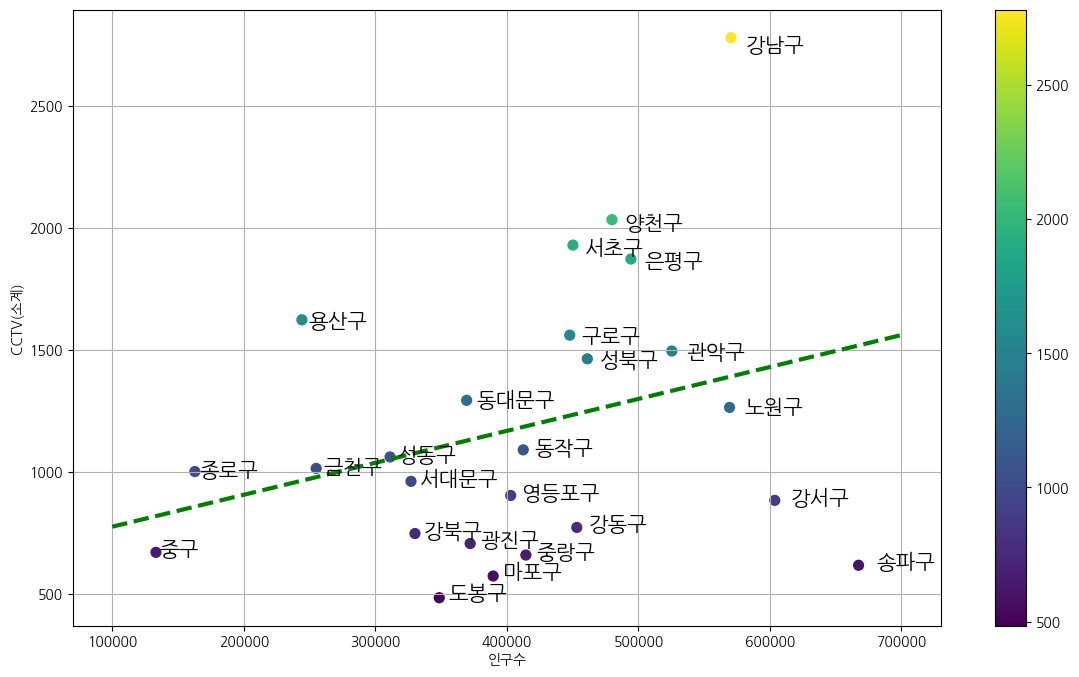

In [44]:
# 구별로 분포를 알아보기
import numpy as np
fp1 = np.polyfit(all_df['인구수'], all_df['소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

all_df['오차'] = np.abs(all_df['소계'] - f1(all_df['인구수']))
df_sort = all_df.sort_values(by='오차', ascending=False)


# scatter()함수로 산점도 그릴때 한글index값 까지 함께 줄력
plt.figure(figsize = (14, 8))
plt.scatter(all_df['인구수'], all_df['소계'], s = 50, c = all_df['소계'])
# 데이터의 평균선을 표현(직선의 방정식)
plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color='g')
# plt.text(290000, 1000, 'Hello', fontsize = 15)
# index를 출력하는 코드
for n in range(25):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('CCTV(소계)')
plt.grid()
plt.colorbar()
plt.show()

## Matplotlib

### 1. 기본 그래프 그리기

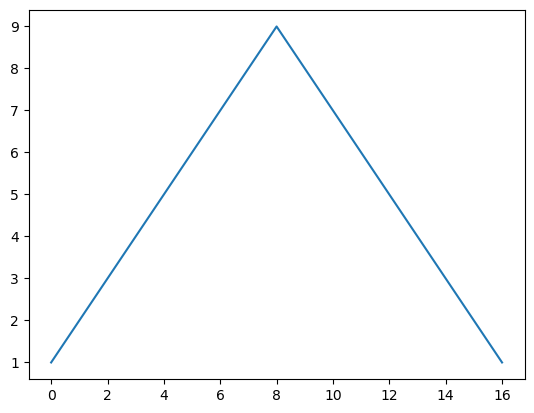

In [51]:
import matplotlib.pyplot as plt
# x 데이터는 자동으로 생성
# y 데이터
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1])
plt.show()

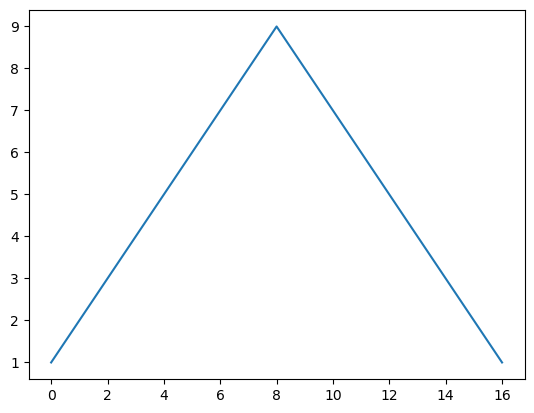

In [52]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1]
plt.plot(x, y)
plt.show()

for문을 이용하여 x, y값 만들어주기

In [53]:
x = []
for i in range(17):
    x.append(i)

In [54]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [56]:
y = []
for i in range(1, 10):
    y.append(i)
for i in range(8, 0, -1):
    y.append(i)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 2, 1]


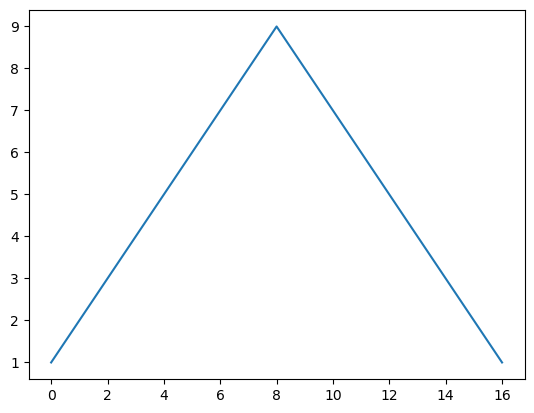

In [57]:
plt.plot(x, y)
plt.show()

### 2. 그래프의 크기 조정

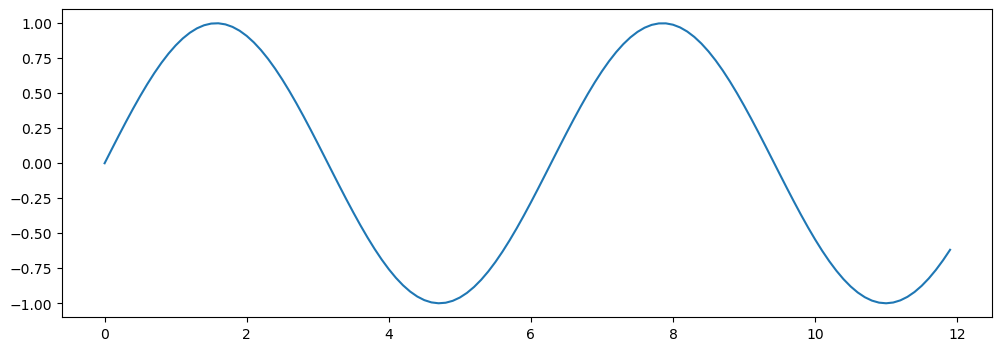

In [58]:
# sin(x)의 그래프를 그린다
import numpy as np
# numpy array + range()  = np.arange
x = np.arange(0, 12, 0.1)
y = np.sin(x)

# 화면에 표출되는 그래프의 크기
plt.figure(figsize = (12, 4))

plt.plot(x, y)

### 3. 그래프의 눈금 추가하기

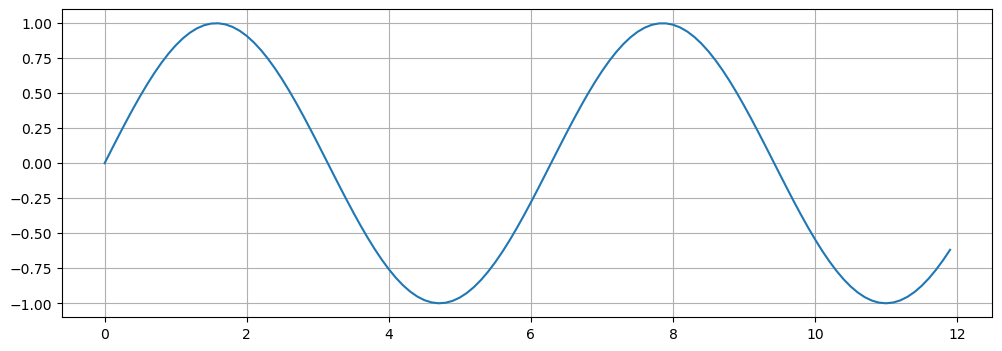

In [59]:
x = np.arange(0, 12, 0.1)
y = np.sin(x)

plt.figure(figsize = (12, 4))

# 그래프의 눈금을 추가해준다
plt.grid()

plt.plot(x, y)
plt.show()

### 4. 그래프의 레이블 추가하기

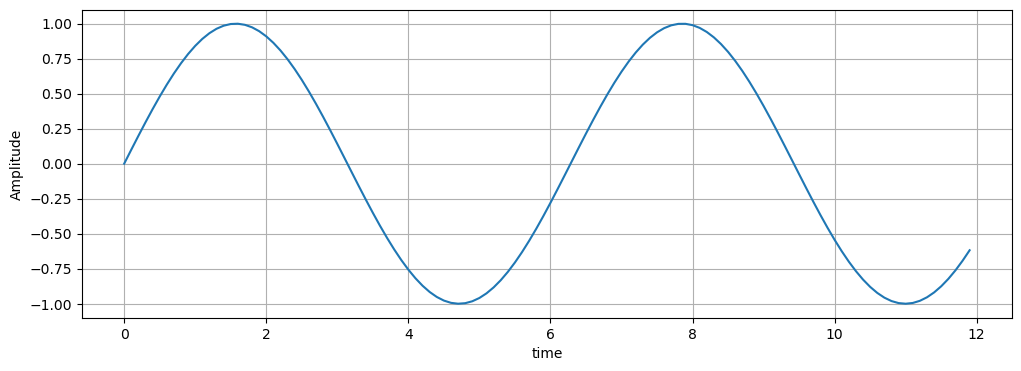

In [60]:
x = np.arange(0, 12, 0.1)
y = np.sin(x)

plt.figure(figsize = (12, 4))

plt.grid()

# x, y에 레이블 추가하기
plt.xlabel('time')
plt.ylabel('Amplitude')

plt.plot(x, y)
plt.show()

### 5. 그래프 제목 추가하기

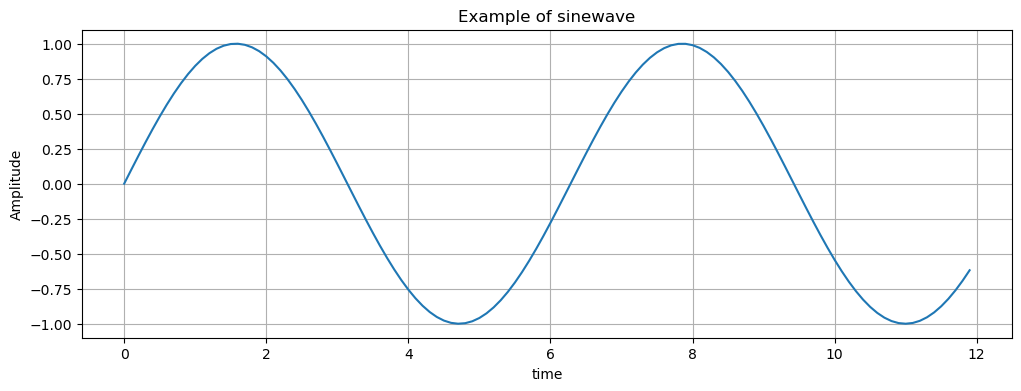

In [61]:
x = np.arange(0, 12, 0.1)
y = np.sin(x)

plt.figure(figsize = (12, 4))

plt.grid()

# 제목추가
plt.title('Example of sinewave')
plt.xlabel('time')
plt.ylabel('Amplitude')

plt.plot(x, y)
plt.show()

### 6. 하나의 그래프창에 두개의 그래프 그리기: 그래프의 색상이 서로 달라야 한다

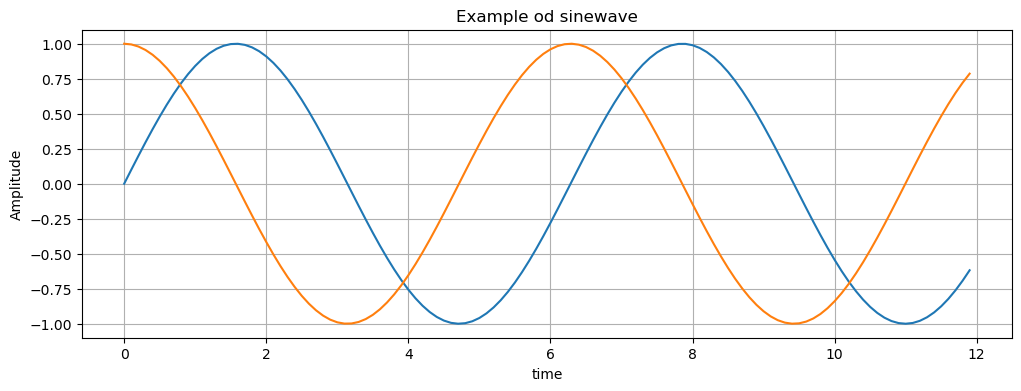

In [62]:
x = np.arange(0,12, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize = (12, 4))
plt.grid()


plt.title('Example od sinewave')
plt.xlabel('time')
plt.ylabel('Amplitude')
# 새로운 그래프추가
plt.plot(x, y1)
plt.plot(x, y2)

plt.show()

### 7. legend(범례)추가

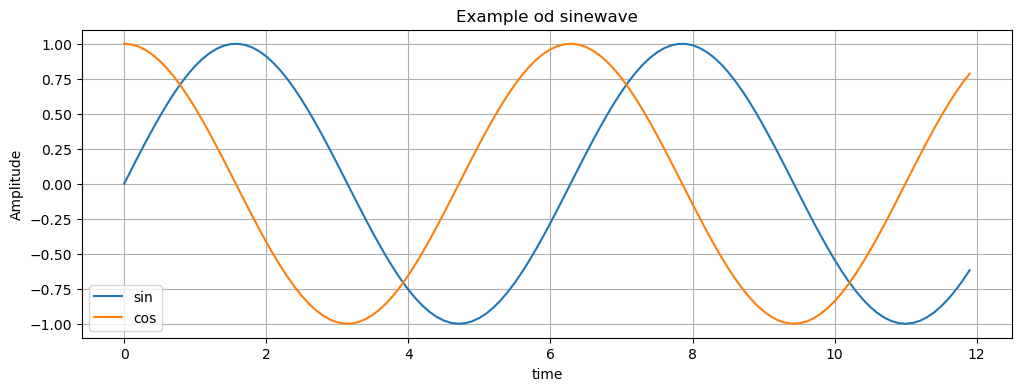

In [64]:
x = np.arange(0,12, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize = (12, 4))
plt.grid()


plt.title('Example od sinewave')
plt.xlabel('time')
plt.ylabel('Amplitude')
# 범례설정
plt.plot(x, y1, label = 'sin')
plt.plot(x, y2, label = 'cos')
plt.legend()
plt.show()

### 8. 그래프의 색상, 선모양, 두께 사용자 지정하기

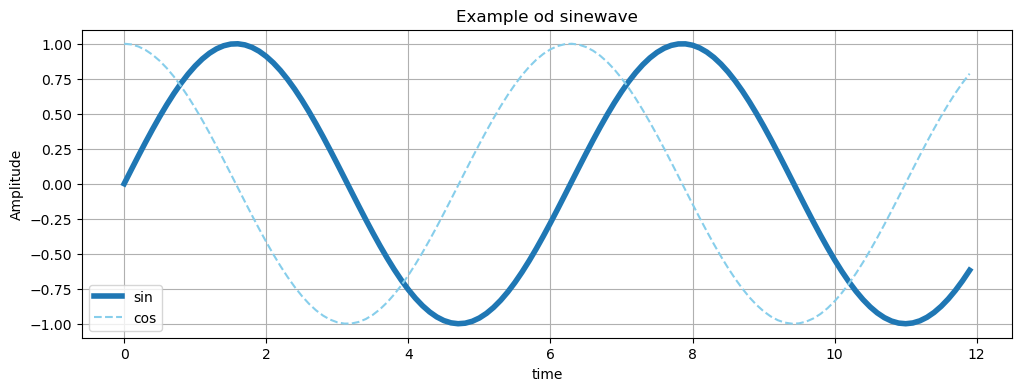

In [65]:
x = np.arange(0,12, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize = (12, 4))
plt.grid()


plt.title('Example od sinewave')
plt.xlabel('time')
plt.ylabel('Amplitude')

plt.plot(x, y1, lw = 4, label = 'sin')
# plt.plot(x, y2, lw = 2, c = 'skyblue',label = 'cos')
plt.plot(x, y2, '--', c = 'skyblue',label = 'cos')
plt.legend()
plt.show()

### 9. 특정영역 확대하기

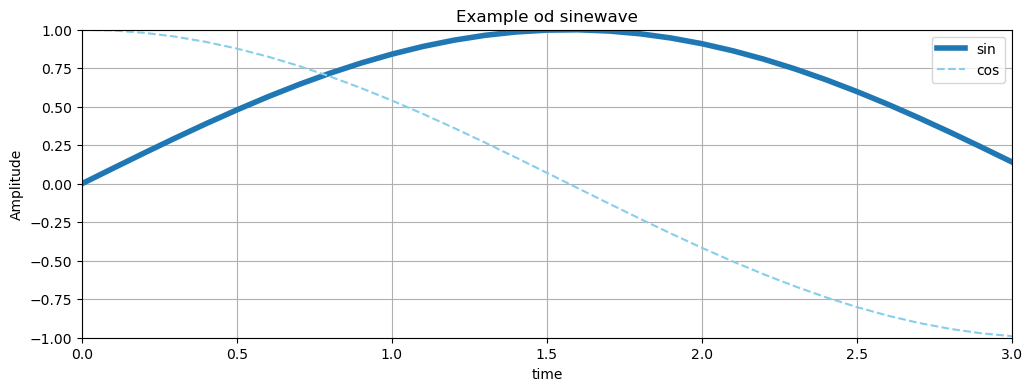

In [66]:
x = np.arange(0,12, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize = (12, 4))
plt.grid()


plt.title('Example od sinewave')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.plot(x, y1, lw = 4, label = 'sin')
# plt.plot(x, y2, lw = 2, c = 'skyblue',label = 'cos')
plt.plot(x, y2, '--', c = 'skyblue',label = 'cos')
# 특정영역 확대 x는 0부터 3까지, y는 -0.1부터 1.1까지
plt.xlim(0, 3)
# plt.ylim(-0.1, 1.1)
plt.ylim(-1.0, 1.0)
plt.legend()
plt.show()

여기까지는 연속된 데이터를 연결해서 선으로 그려주는 plot()함수였다면, <br>
지금부터는 spot성으로 된 데이터형태로 표출하고자 한다.

### scatter형태의 그래프

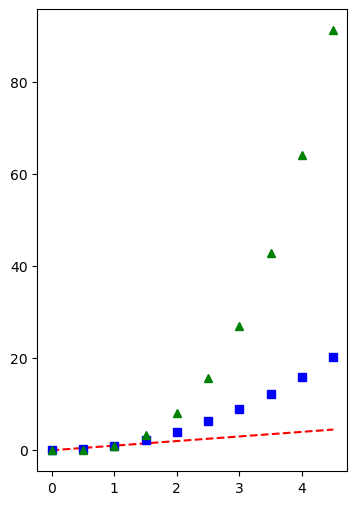

In [67]:
# 하나의 그래프에 3개를 동시에 그릴때
x = np.arange(0, 5, 0.5)
# print(type(x))

# 1.  그래프 크기 설정
plt.figure(figsize = (4, 6))
# 'bs' : 'blue' + 'square

# 1st:  y = x
plt.plot(x, x, 'r--')

# 2nd: y = x**2
plt.plot(x, x**2, 'bs')

# 3rd: y = x**3
plt.plot(x, x**3, 'g^')

plt.show()

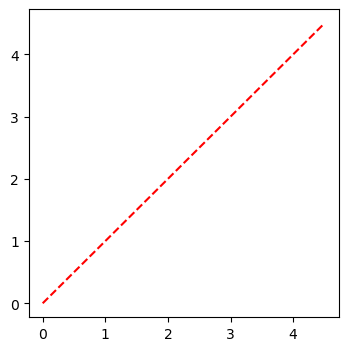

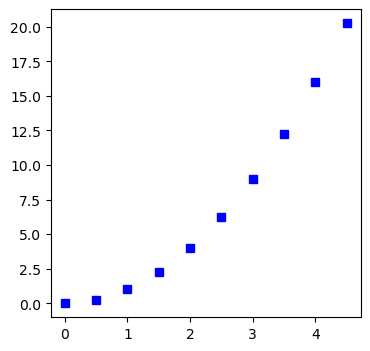

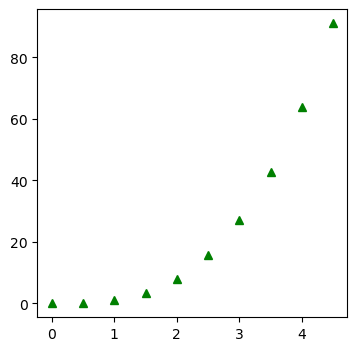

In [68]:
# 각각의 그래프를 따로 출력하고 싶을때
x = np.arange(0, 5, 0.5)
# print(type(x))

# 1.  그래프 크기 설정
plt.figure(figsize = (4, 4))
pl1 = plt.plot(x, x, 'r--')

# 2nd: y = x**2
plt.figure(figsize = (4, 4))
pl2 = plt.plot(x, x**2, 'bs')

# 3rd: y = x**3
plt.figure(figsize = (4, 4))
pl3 = plt.plot(x, x**3, 'g^')

plt.show()

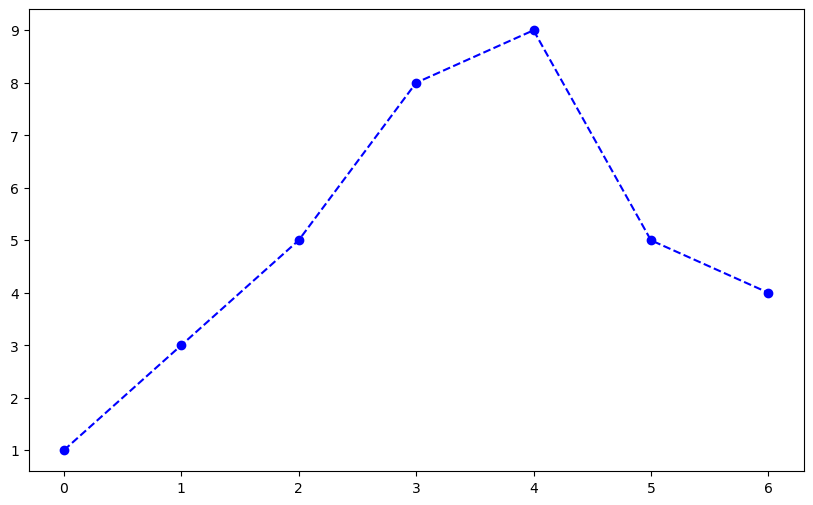

In [69]:
# 꺾은선 그래프(데이터 간격이 촘촘하면 부드럽게 그래프가 그려질 것이다)
x = [0, 1, 2, 3, 4, 5, 6]
y = [1, 3, 5, 8, 9, 5, 4]
plt.figure(figsize = (10, 6))
plt.plot(x, y, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.show()

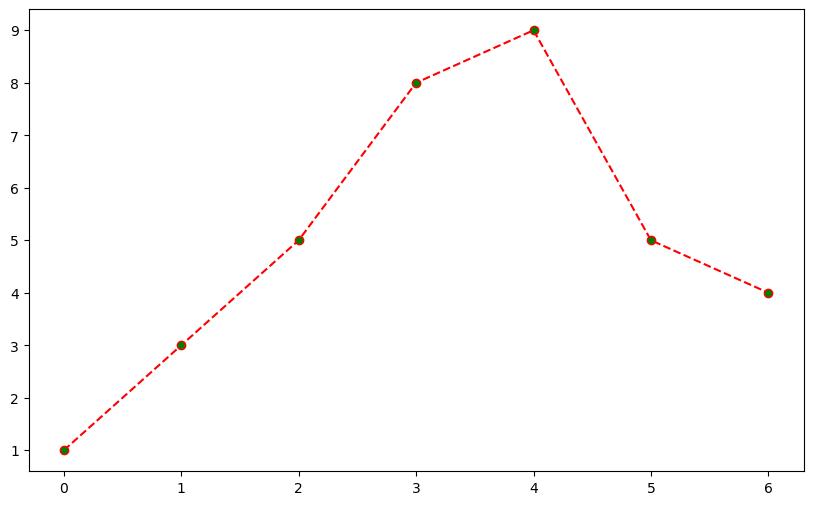

In [70]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [1, 3, 5, 8, 9, 5, 4]
plt.figure(figsize = (10, 6))
# marker의 색상 변경하기
plt.plot(x, y, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'green')
plt.show()

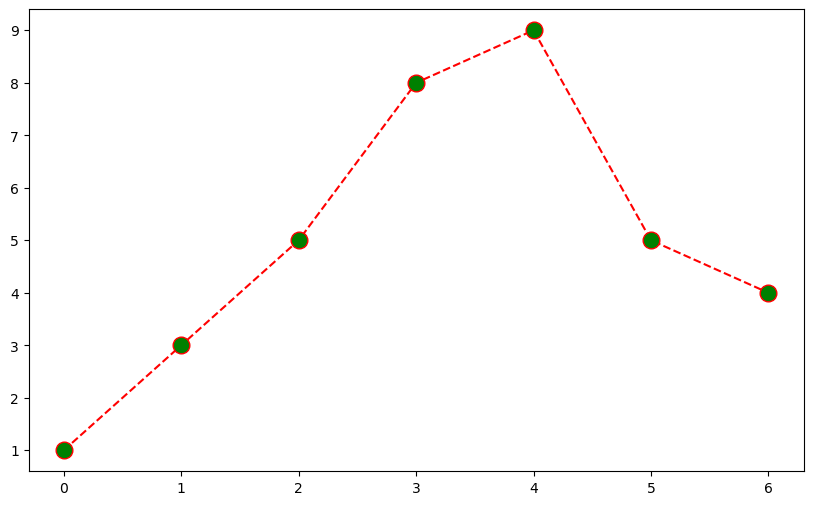

In [71]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [1, 3, 5, 8, 9, 5, 4]
plt.figure(figsize = (10, 6))
# marker의 사이즈 변경
plt.plot(x, y, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'green', markersize = 12)
plt.show()

참고주소: https://matplotlib.org/3.5.3/api/markers_api.html

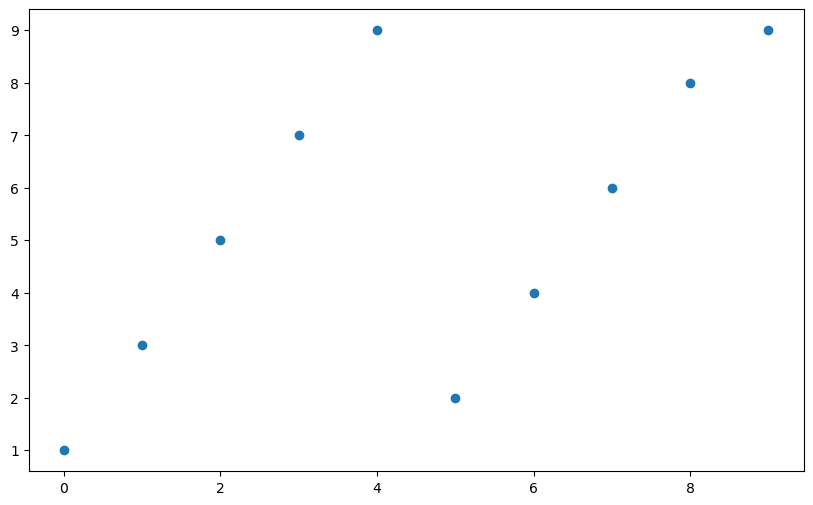

In [73]:
# 산점도
x = np.arange(0, 10, 1)
y = np.array([1, 3, 5, 7, 9, 2, 4, 6, 8, 9])
plt.figure(figsize = (10, 6))
plt.scatter(x, y)
plt.show()

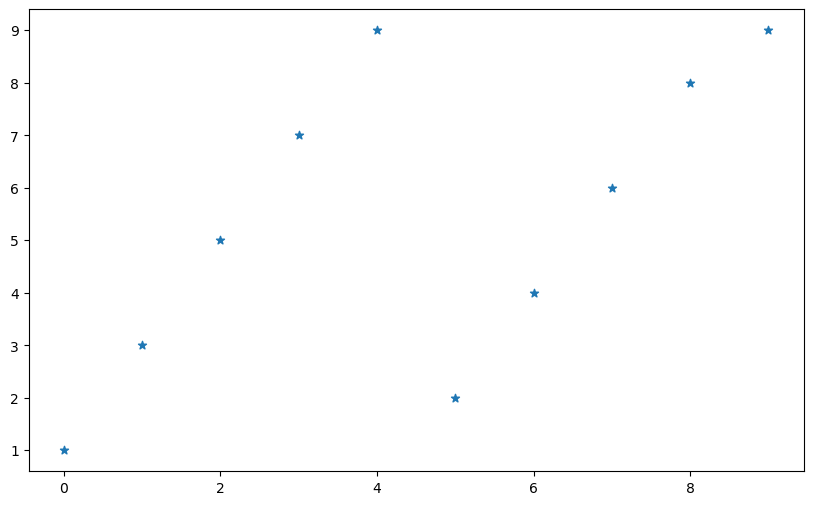

In [74]:
# 산점도 마커변경
x = np.arange(0, 10, 1)
y = np.array([1, 3, 5, 7, 9, 2, 4, 6, 8, 9])
plt.figure(figsize = (10, 6))
plt.scatter(x, y, marker ='*')
plt.show()

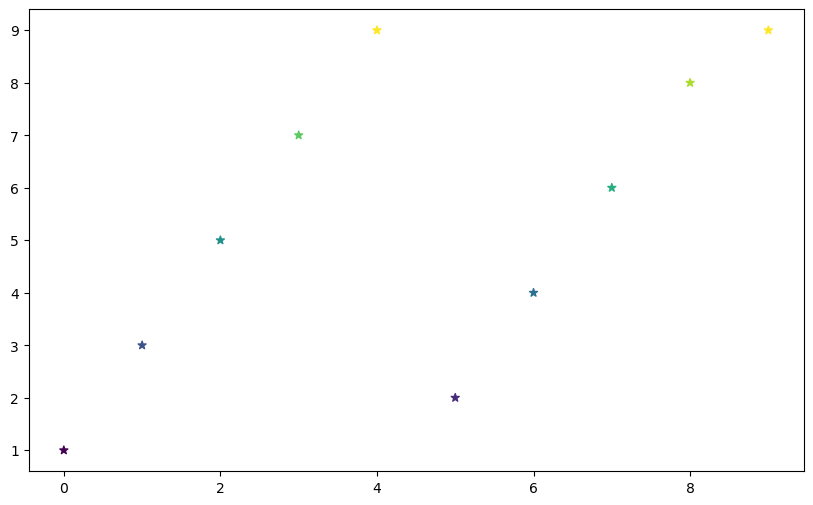

In [75]:
# 산점도 마커 색상 변경
x = np.arange(0, 10, 1)
y = np.array([1, 3, 5, 7, 9, 2, 4, 6, 8, 9])
colormap = y
plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = colormap, marker ='*')
plt.show()

색 참고: https://matplotlib.org/stable/tutorials/colors/colormaps.html

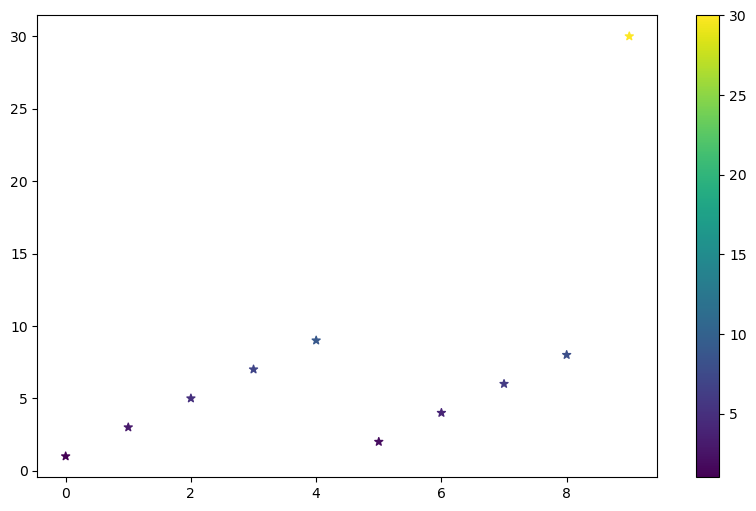

In [76]:
# 산점도 마커 색상바 표충
x = np.arange(0, 10, 1)
y = np.array([1, 3, 5, 7, 9, 2, 4, 6, 8, 30])
colormap = y
plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = colormap, marker ='*')
# 최소,최대값의 영향을 받는다
plt.colorbar()
plt.show()

In [77]:
# 난수를 발생시킨다. 평균이 0, 스케일이 1이고, 난수를 발생시키는 샘플의 갯수가 1000
s1 = np.random.normal(loc = 0, scale = 1, size = 1000)

# 난수를 발생시킨다. 평균이 5, 스케일이 0.5이고, 난수를 발생시키는 샘플의 갯수가 1000
s2 = np.random.normal(loc = 5, scale = 0.5, size = 1000)

# 난수를 발생시킨다. 평균이 10, 스케일이 2이고, 난수를 발생시키는 샘플의 갯수가 1000
s3 = np.random.normal(loc = 10, scale = 2, size = 1000)

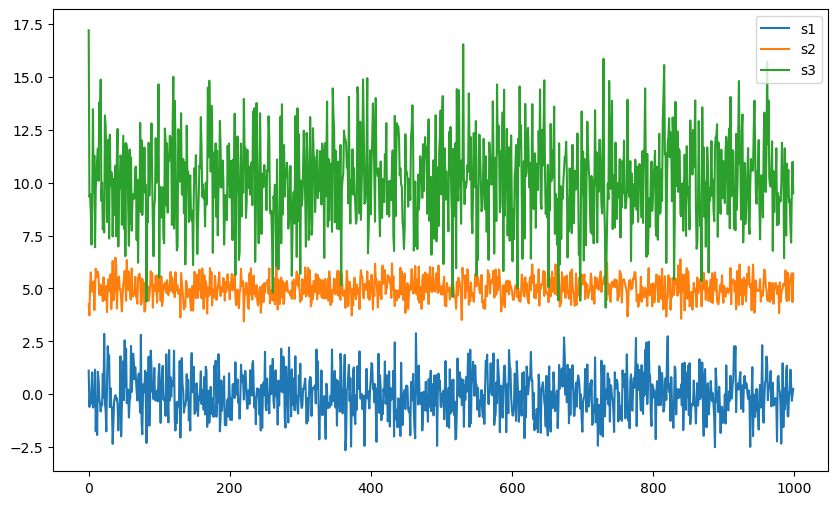

In [78]:
plt.figure(figsize = (10, 6))
plt.plot(s1, label = 's1')
plt.plot(s2, label = 's2')
plt.plot(s3, label = 's3')
plt.legend()
plt.show()

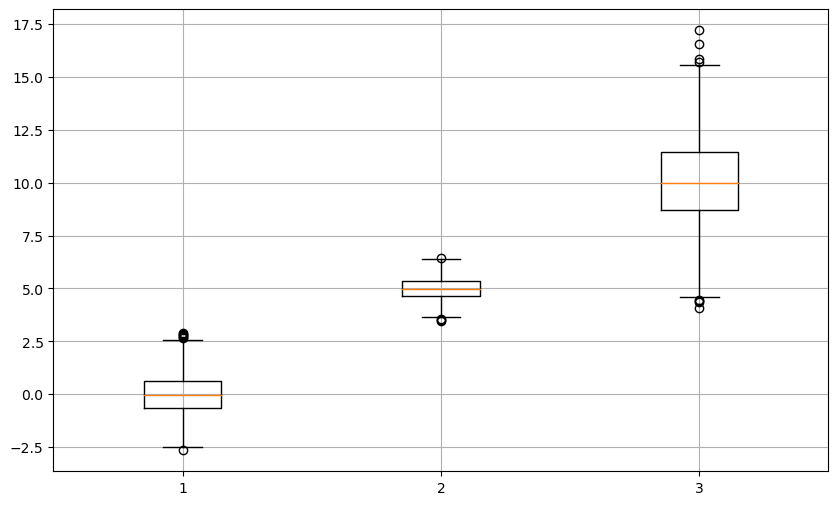

In [79]:
# box-plot
plt.figure(figsize = (10, 6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()